<a href="https://colab.research.google.com/github/Aravind-Unni/Transfer-Learning-with-Graph-Neural-Networks-for-Solubility-Prediction/blob/main/genoproj003main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install smogn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
import seaborn as sns
import smogn

In [ ]:
df=pd.read_csv('/content/curated-solubility-dataset.csv')
df

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.000000,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.000000,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.000000,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.000000,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.000000,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,I-84,tetracaine,InChI=1S/C15H24N2O2/c1-4-5-10-16-14-8-6-13(7-9...,GKCBAIGFKIBETG-UHFFFAOYSA-N,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,-3.010000,0.000000,1,G1,264.369,...,8.0,106.0,1.0,0.0,0.0,1.0,41.57,115.300645,2.394548e+00,374.236893
9978,I-85,tetracycline,InChI=1S/C22H24N2O8/c1-21(31)8-5-4-6-11(25)12(...,OFVLGDICTFRJMM-WESIUVDSSA-N,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,-2.930000,0.000000,1,G1,444.440,...,2.0,170.0,1.0,0.0,3.0,4.0,181.62,182.429237,2.047922e+00,1148.584975
9979,I-86,thymol,InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)6-10(9)11/h4...,MGSRCZKZVOBKFT-UHFFFAOYSA-N,c1(cc(ccc1C(C)C)C)O,-2.190000,0.019222,3,G5,150.221,...,1.0,60.0,1.0,0.0,0.0,1.0,20.23,67.685405,3.092720e+00,251.049732
9980,I-93,verapamil,"InChI=1S/C27H38N2O4/c1-20(2)27(19-28,22-10-12-...",SGTNSNPWRIOYBX-UHFFFAOYSA-N,COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...,-3.980000,0.000000,1,G1,454.611,...,13.0,180.0,2.0,0.0,0.0,2.0,63.95,198.569223,2.023333e+00,938.203977


In [ ]:
df

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.000000,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.000000,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.000000,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.000000,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.000000,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,I-84,tetracaine,InChI=1S/C15H24N2O2/c1-4-5-10-16-14-8-6-13(7-9...,GKCBAIGFKIBETG-UHFFFAOYSA-N,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,-3.010000,0.000000,1,G1,264.369,...,8.0,106.0,1.0,0.0,0.0,1.0,41.57,115.300645,2.394548e+00,374.236893
9978,I-85,tetracycline,InChI=1S/C22H24N2O8/c1-21(31)8-5-4-6-11(25)12(...,OFVLGDICTFRJMM-WESIUVDSSA-N,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,-2.930000,0.000000,1,G1,444.440,...,2.0,170.0,1.0,0.0,3.0,4.0,181.62,182.429237,2.047922e+00,1148.584975
9979,I-86,thymol,InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)6-10(9)11/h4...,MGSRCZKZVOBKFT-UHFFFAOYSA-N,c1(cc(ccc1C(C)C)C)O,-2.190000,0.019222,3,G5,150.221,...,1.0,60.0,1.0,0.0,0.0,1.0,20.23,67.685405,3.092720e+00,251.049732
9980,I-93,verapamil,"InChI=1S/C27H38N2O4/c1-20(2)27(19-28,22-10-12-...",SGTNSNPWRIOYBX-UHFFFAOYSA-N,COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...,-3.980000,0.000000,1,G1,454.611,...,13.0,180.0,2.0,0.0,0.0,2.0,63.95,198.569223,2.023333e+00,938.203977


In [ ]:
# Select only the non-numeric columns that you need
non_numeric_features = df[['Name', 'InChI', 'InChIKey', 'SMILES']]

# Display the first few rows of the selected features
print(non_numeric_features.head())

                                                Name  \
0         N,N,N-trimethyloctadecan-1-aminium bromide   
1                           Benzo[cd]indol-2(1H)-one   
2                               4-chlorobenzaldehyde   
3  zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...   
4  4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...   

                                               InChI  \
0  InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...   
1  InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...   
2        InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H   
3  InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...   
4  InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...   

                      InChIKey  \
0  SZEMGTQCPRNXEG-UHFFFAOYSA-M   
1  GPYLCFQEKPUWLD-UHFFFAOYSA-N   
2  AVPYQKSLYISFPO-UHFFFAOYSA-N   
3  XTUPUYCJWKHGSW-UHFFFAOYSA-L   
4  FAUAZXVRLVIARB-UHFFFAOYSA-N   

                                              SMILES  
0                [Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C  
1          

In [ ]:
# Check basic stats
print(df['Solubility'].describe())

count    9982.000000
mean       -2.889909
std         2.368154
min       -13.171900
25%        -4.326325
50%        -2.618173
75%        -1.209735
max         2.137682
Name: Solubility, dtype: float64


In [ ]:
num_null = df["Solubility"].isnull().sum()
print("Number of null values in 'Solubility' column:", num_null)

Number of null values in 'Solubility' column: 0


In [ ]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Display the numeric-only DataFrame
print("Numeric columns:")
print(df_numeric.head())


Numeric columns:
   Solubility   SD  Ocurrences    MolWt  MolLogP     MolMR  HeavyAtomCount  \
0   -3.616127  0.0           1  392.510   3.9581  102.4454            23.0   
1   -3.254767  0.0           1  169.183   2.4055   51.9012            13.0   
2   -2.177078  0.0           1  140.569   2.1525   36.8395             9.0   
3   -3.924409  0.0           1  756.226   8.1161  200.7106            53.0   
4   -4.662065  0.0           1  422.525   2.4854  119.0760            31.0   

   NumHAcceptors  NumHDonors  NumHeteroatoms  NumRotatableBonds  \
0            0.0         0.0             2.0               17.0   
1            1.0         1.0             2.0                0.0   
2            1.0         0.0             2.0                1.0   
3            6.0         2.0             7.0               10.0   
4            6.0         0.0             6.0               12.0   

   NumValenceElectrons  NumAromaticRings  NumSaturatedRings  \
0                142.0               0.0        

In [ ]:
corr_matrix = df_numeric.corr()

# Print the correlation matrix to the console
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
                     Solubility        SD  Ocurrences     MolWt   MolLogP  \
Solubility             1.000000 -0.099553   -0.021133 -0.368032 -0.608580   
SD                    -0.099553  1.000000    0.489628  0.000316  0.052496   
Ocurrences            -0.021133  0.489628    1.000000 -0.089321 -0.017733   
MolWt                 -0.368032  0.000316   -0.089321  1.000000  0.274489   
MolLogP               -0.608580  0.052496   -0.017733  0.274489  1.000000   
MolMR                 -0.424452  0.005535   -0.093789  0.918897  0.489295   
HeavyAtomCount        -0.352748 -0.006657   -0.097888  0.950358  0.333832   
NumHAcceptors          0.040020 -0.050575   -0.093552  0.728544 -0.249365   
NumHDonors             0.193066 -0.049584   -0.050153  0.300740 -0.266122   
NumHeteroatoms        -0.040432 -0.050257   -0.091217  0.778160 -0.238849   
NumRotatableBonds     -0.222040  0.036640   -0.052953  0.607132  0.400844   
NumValenceElectrons   -0.346369 -0.000940   -0.095099  0

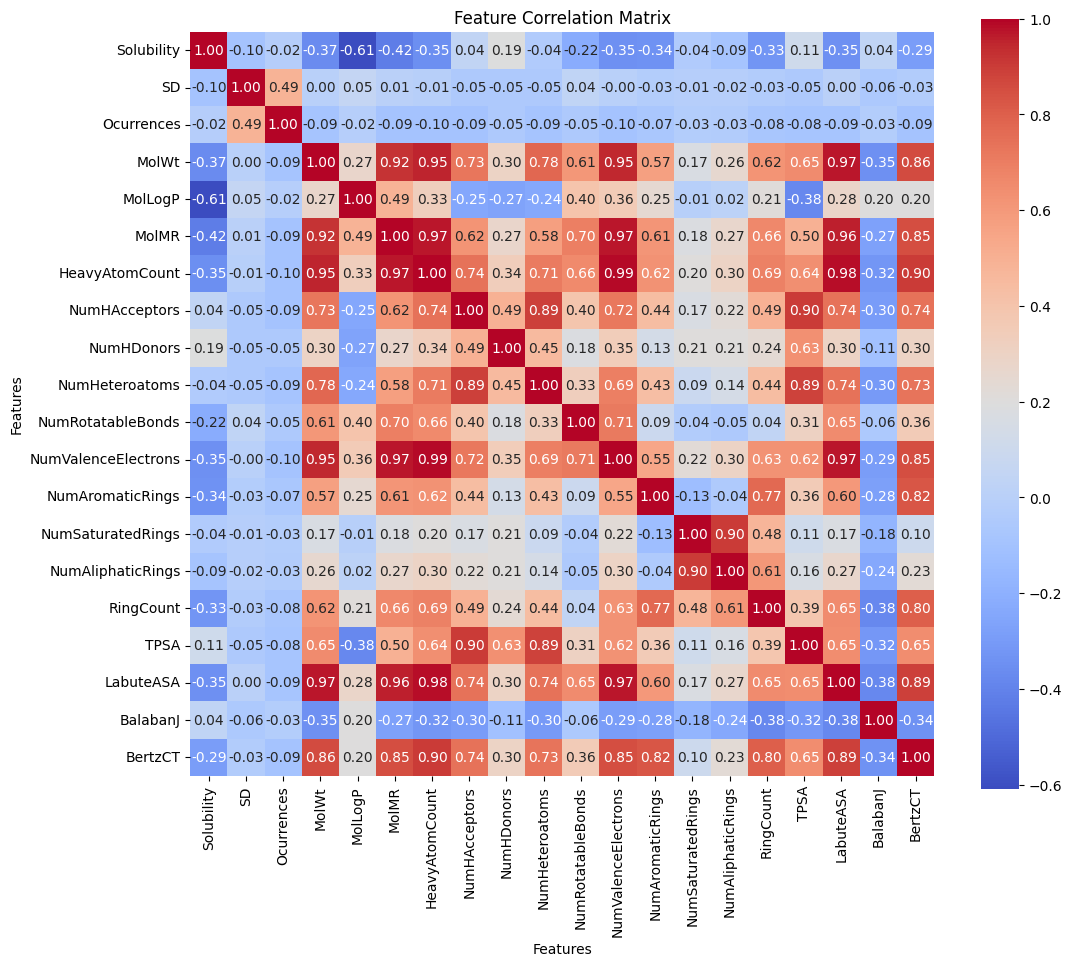

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

molmr heavyatomcount numAliphaticRings TPSA Bertz2CT LabuteASA NumValenceElectrons

Dropped columns due to high correlation: ['MolMR', 'HeavyAtomCount', 'NumValenceElectrons', 'NumAliphaticRings', 'TPSA', 'LabuteASA', 'BertzCT']


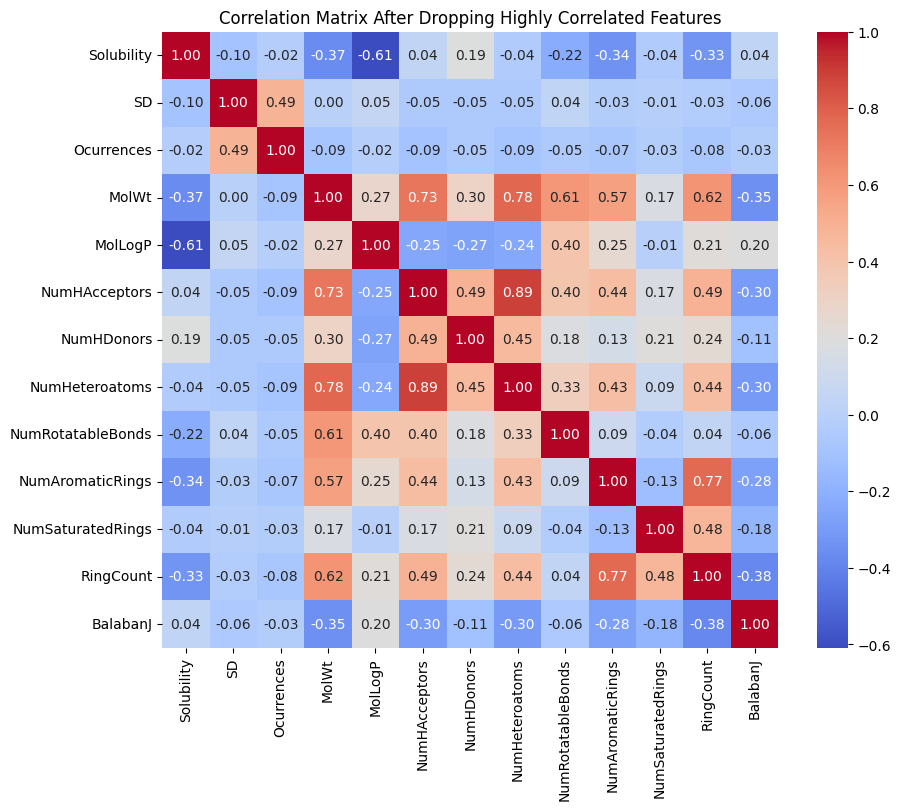

In [ ]:
def drop_highly_correlated_features(df, threshold=0.9):
    # Compute the absolute correlation matrix
    corr_matrix = df.corr().abs()

    # Select the upper triangle of the correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Identify features with correlation greater than the threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    # Drop the identified features
    df_reduced = df.drop(columns=to_drop)
    return df_reduced, to_drop

# Now drop highly correlated features from the numeric dataset
df_reduced, dropped_columns = drop_highly_correlated_features(df_numeric, threshold=0.9)
print("Dropped columns due to high correlation:", dropped_columns)


plt.figure(figsize=(10, 8))
sns.heatmap(df_reduced.corr(), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix After Dropping Highly Correlated Features")
plt.show()


In [ ]:

# List of columns to remove
columns_to_drop = [
    "MolMR",
    "HeavyAtomCount",
    "NumAliphaticRings",
    "TPSA",
    "Bertz2CT",
    "LabuteASA",
    "NumValenceElectrons"
]

# Drop the specified columns (errors='ignore' avoids error if a column is missing)
df_final= df_numeric.drop(columns=columns_to_drop, errors='ignore')

# Check the first few rows of the updated DataFrame
print(df.head())


    ID                                               Name  \
0  A-3         N,N,N-trimethyloctadecan-1-aminium bromide   
1  A-4                           Benzo[cd]indol-2(1H)-one   
2  A-5                               4-chlorobenzaldehyde   
3  A-8  zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...   
4  A-9  4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...   

                                               InChI  \
0  InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...   
1  InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...   
2        InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H   
3  InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...   
4  InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...   

                      InChIKey  \
0  SZEMGTQCPRNXEG-UHFFFAOYSA-M   
1  GPYLCFQEKPUWLD-UHFFFAOYSA-N   
2  AVPYQKSLYISFPO-UHFFFAOYSA-N   
3  XTUPUYCJWKHGSW-UHFFFAOYSA-L   
4  FAUAZXVRLVIARB-UHFFFAOYSA-N   

                                              SMILES  Solubility   SD  \
0                [

In [ ]:
df_final

,Solubility,SD,Ocurrences,MolWt,MolLogP,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumAromaticRings,NumSaturatedRings,RingCount,BalabanJ,BertzCT
0,-3.616127,0.000000,1,392.510,3.95810,0.0,0.0,2.0,17.0,0.0,0.0,0.0,0.000000e+00,210.377334
1,-3.254767,0.000000,1,169.183,2.40550,1.0,1.0,2.0,0.0,2.0,0.0,3.0,2.582996e+00,511.229248
2,-2.177078,0.000000,1,140.569,2.15250,1.0,0.0,2.0,1.0,1.0,0.0,1.0,3.009782e+00,202.661065
3,-3.924409,0.000000,1,756.226,8.11610,6.0,2.0,7.0,10.0,6.0,0.0,6.0,2.322963e-07,1964.648666
4,-4.662065,0.000000,1,422.525,2.48540,6.0,0.0,6.0,12.0,2.0,4.0,6.0,1.084427e+00,769.899934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,-3.010000,0.000000,1,264.369,2.61700,4.0,1.0,4.0,8.0,1.0,0.0,1.0,2.394548e+00,374.236893
9978,-2.930000,0.000000,1,444.440,-0.21440,9.0,6.0,10.0,2.0,1.0,0.0,4.0,2.047922e+00,1148.584975
9979,-2.190000,0.019222,3,150.221,2.82402,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3.092720e+00,251.049732
9980,-3.980000,0.000000,1,454.611,5.09308,6.0,0.0,6.0,13.0,2.0,0.0,2.0,2.023333e+00,938.203977


In [ ]:
# Ensure both dataframes have the same index or a common column for merging
df= pd.concat([non_numeric_features,df_final], axis=1)
df

,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,MolWt,MolLogP,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumAromaticRings,NumSaturatedRings,RingCount,BalabanJ,BertzCT
0,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.000000,1,392.510,3.95810,0.0,0.0,2.0,17.0,0.0,0.0,0.0,0.000000e+00,210.377334
1,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.000000,1,169.183,2.40550,1.0,1.0,2.0,0.0,2.0,0.0,3.0,2.582996e+00,511.229248
2,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.000000,1,140.569,2.15250,1.0,0.0,2.0,1.0,1.0,0.0,1.0,3.009782e+00,202.661065
3,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.000000,1,756.226,8.11610,6.0,2.0,7.0,10.0,6.0,0.0,6.0,2.322963e-07,1964.648666
4,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.000000,1,422.525,2.48540,6.0,0.0,6.0,12.0,2.0,4.0,6.0,1.084427e+00,769.899934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,tetracaine,InChI=1S/C15H24N2O2/c1-4-5-10-16-14-8-6-13(7-9...,GKCBAIGFKIBETG-UHFFFAOYSA-N,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,-3.010000,0.000000,1,264.369,2.61700,4.0,1.0,4.0,8.0,1.0,0.0,1.0,2.394548e+00,374.236893
9978,tetracycline,InChI=1S/C22H24N2O8/c1-21(31)8-5-4-6-11(25)12(...,OFVLGDICTFRJMM-WESIUVDSSA-N,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,-2.930000,0.000000,1,444.440,-0.21440,9.0,6.0,10.0,2.0,1.0,0.0,4.0,2.047922e+00,1148.584975
9979,thymol,InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)6-10(9)11/h4...,MGSRCZKZVOBKFT-UHFFFAOYSA-N,c1(cc(ccc1C(C)C)C)O,-2.190000,0.019222,3,150.221,2.82402,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3.092720e+00,251.049732
9980,verapamil,"InChI=1S/C27H38N2O4/c1-20(2)27(19-28,22-10-12-...",SGTNSNPWRIOYBX-UHFFFAOYSA-N,COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...,-3.980000,0.000000,1,454.611,5.09308,6.0,0.0,6.0,13.0,2.0,0.0,2.0,2.023333e+00,938.203977


In [ ]:
!pip install Rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 44.8 MB/s eta 0:00:00


In [ ]:
pip install torch_geometric -f https://data.pyg.org/whl/torch-2.5.1+cu121.html

Looking in links: https://data.pyg.org/whl/torch-2.5.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.4 MB/s eta 0:00:00


In [ ]:
pip install torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-2.5.1+cu121.html

Looking in links: https://data.pyg.org/whl/torch-2.5.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 84.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.8/994.8 kB 3.5 MB/s eta 0:00:00


In [ ]:
import os
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.warning')

In [ ]:
import networkx as nx
import torch
import torch.nn.functional as F
from torch.utils.data import random_split
from torch_geometric.data import InMemoryDataset, download_url, extract_gz
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.utils import from_smiles
from torch_geometric.utils import to_networkx
from torch.utils.data import random_split, TensorDataset
from torch_geometric.nn import AttentiveFP

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_scatter_cuda.so: undefined symbol: _ZN2at4_ops16div__Tensor_mode4callERNS_6TensorERKS2_St8optionalIN3c1017basic_string_viewIcEEE
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_spline_conv/_basis_cuda.so: undefined symbol: _ZN5torch8autograd12VariableInfoC1ERKN2at6TensorE
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_sparse/_spmm_cuda.so: undefined sy

In [ ]:
from rdkit import Chem

# Filter out invalid SMILES during dataset creation
valid_indices = []
for i, smile in enumerate(df["SMILES"]):
    mol = Chem.MolFromSmiles(smile)
    if mol is not None:  # Only keep valid molecules
        valid_indices.append(i)

df = df.iloc[valid_indices].reset_index(drop=True)

[15:56:42] Explicit valence for atom # 5 N, 4, is greater than permitted
[15:56:42] Explicit valence for atom # 5 N, 4, is greater than permitted


'Click on the photo to zoom it'

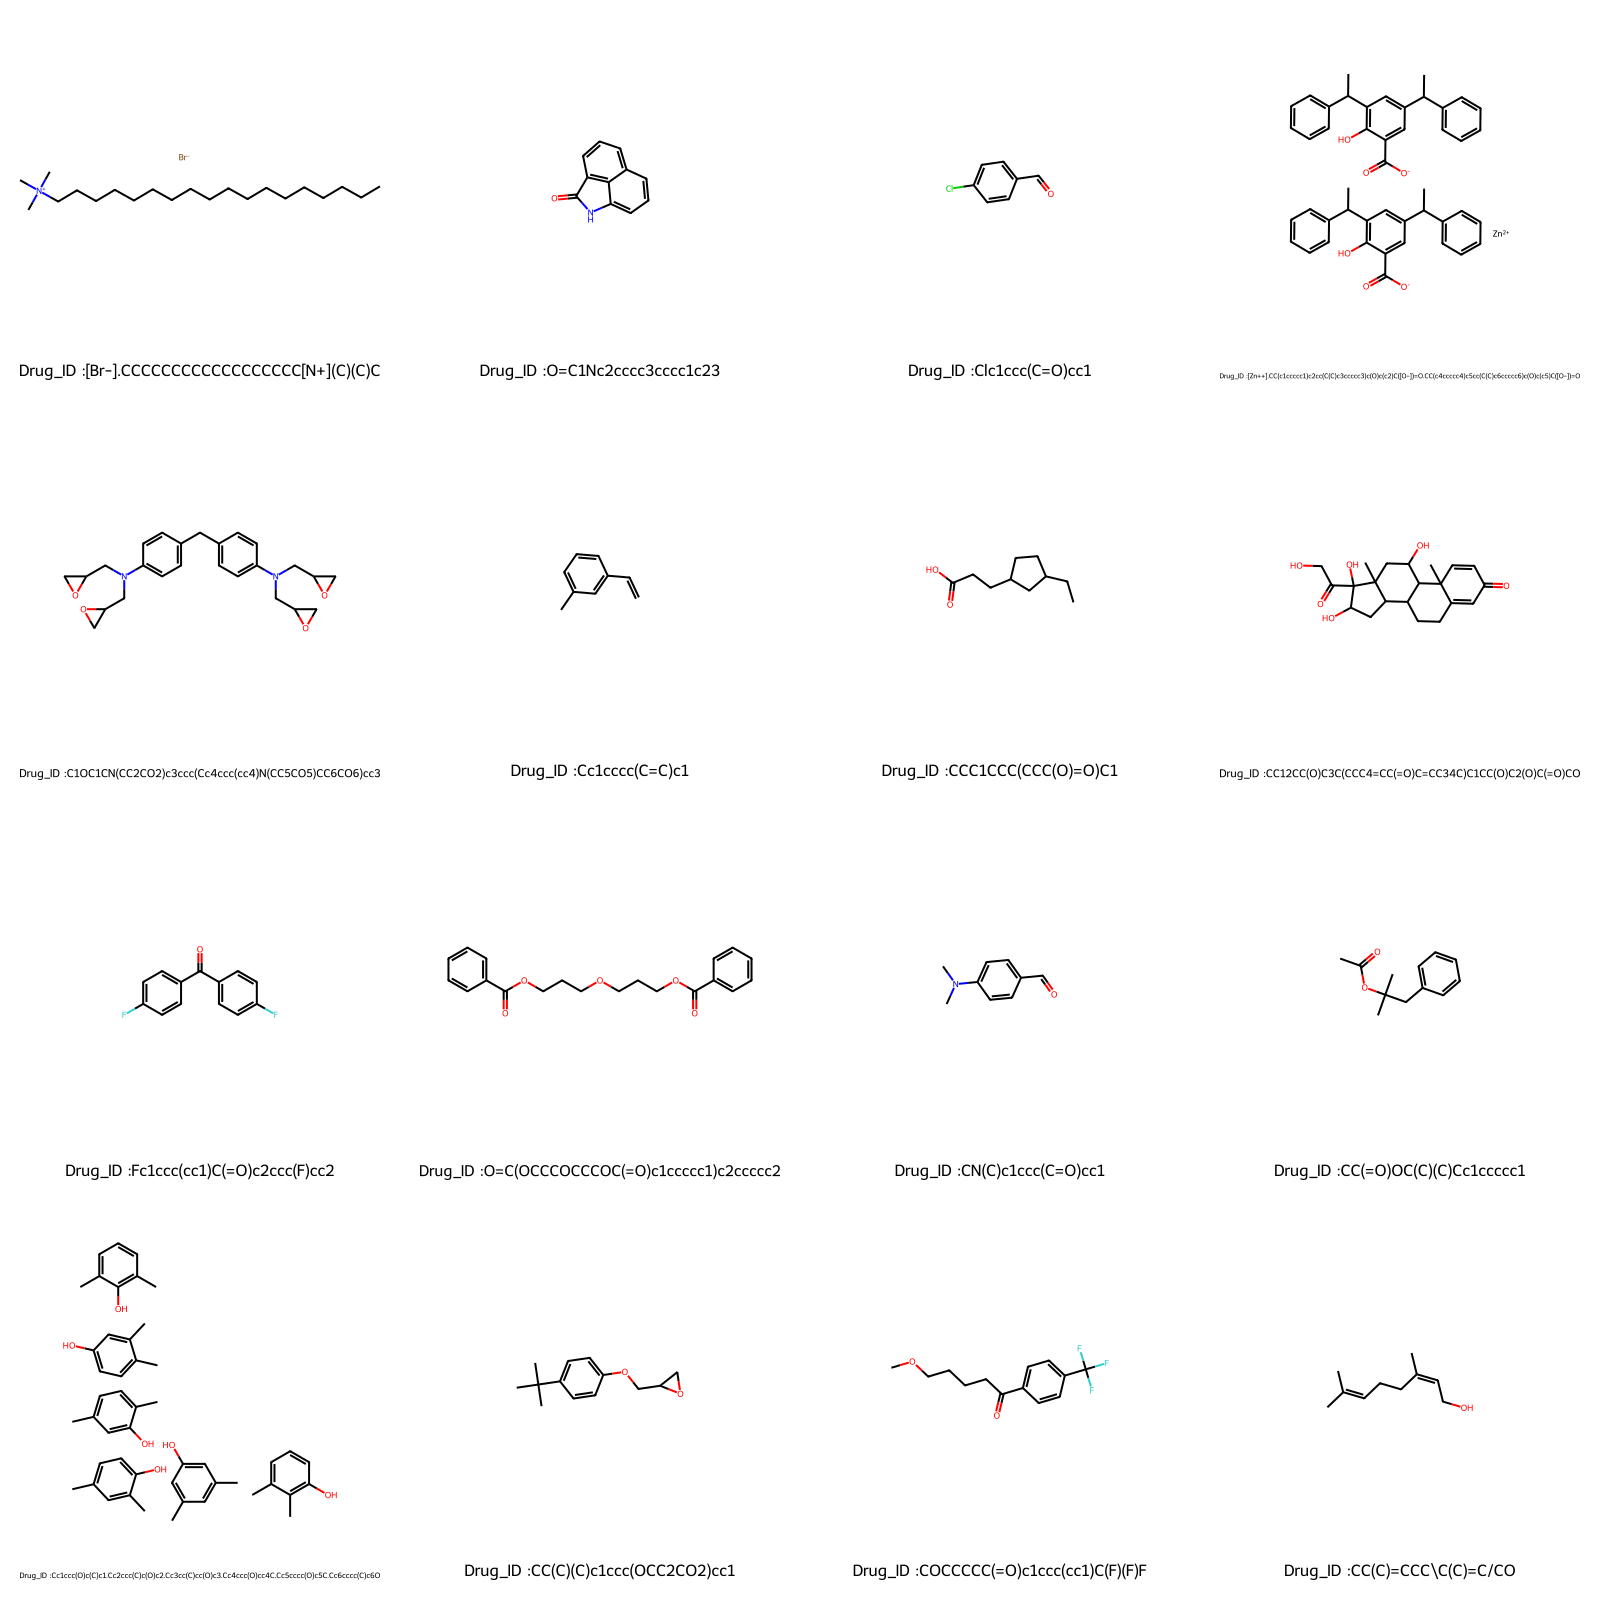

In [ ]:
def show_smiles(smiles):
    # Convert SMILES strings to molecular structures and display them in a grid
    molecules = [Chem.MolFromSmiles(smile) for smile in smiles]
    img = Draw.MolsToGridImage(molecules[:16], molsPerRow= 4, subImgSize=(400, 400),
    legends = [f"Drug_ID :{x}" for x in smiles],
    returnPNG=False).save("molecules.png")
    from IPython.display import display, Image
    display("Click on the photo to zoom it")
    display(Image("molecules.png"))
show_smiles(df["SMILES"])

In [ ]:
from rdkit.Chem import rdMolDescriptors

def augment_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return [smiles]
    # Generate SMILES variants
    return list({Chem.MolToSmiles(mol, canonical=False, doRandom=True) for _ in range(3)})

# Augment SMILES in the dataset
augmented_smiles = []
augmented_solubility = []
for idx, row in df.iterrows():
    smiles_variants = augment_smiles(row['SMILES'])
    augmented_smiles.extend(smiles_variants)
    augmented_solubility.extend([row['Solubility']] * len(smiles_variants))

df_augmented = pd.DataFrame({'SMILES': augmented_smiles, 'Solubility': augmented_solubility})

In [ ]:
# Convert a SMILES string into a molecular graph representation
smile = df['SMILES'][1]
g = from_smiles(smile, with_hydrogen=False)
g

Data(x=[13, 9], edge_index=[2, 30], edge_attr=[30, 3], smiles='O=C1Nc2cccc3cccc1c23')

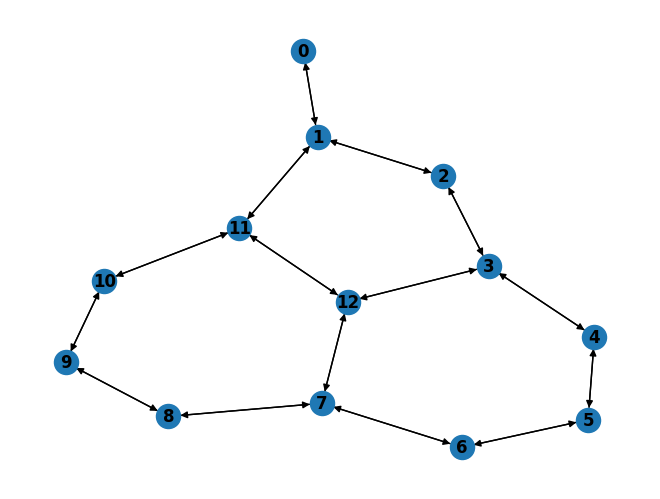

In [ ]:
# Convert the molecular graph into a NetworkX graph and visualize it
G = to_networkx(g)
nx.draw(G, with_labels=True, font_weight='bold')
plt.savefig("G.png")

In [ ]:
graph_list = []
for i, smile in enumerate(df["SMILES"]):
    g = from_smiles(smile) # Convert SMILES to a graph representation
    g.x = g.x.float() # Ensure node features are in float format
    y = torch.tensor(df['Solubility'][i], dtype=torch.float).view(1, -1)  # Convert solubility values to tensors
    g.y = y # Assign solubility value as the target label
    graph_list.append(g)

In [ ]:
class MyOwnDataset(InMemoryDataset):
    def __init__(self, root, transform=None, pre_transform=None, pre_filter=None):
        super().__init__(root, transform, pre_transform, pre_filter)
        self.load(self.processed_paths[0])

    @property
    def raw_file_names(self):
        return 'curated-solubility-dataset.csv' # Expected raw data file name

    @property
    def processed_file_names(self):
        return 'data.dt' # Processed dataset file name

    def download(self):
        pass

    def process(self):
        # Read data into huge `Data` list.
        graph_list = []
        for i, smile in enumerate(df["SMILES"]):
            g = from_smiles(smile)
            g.x = g.x.float()
            y = torch.tensor(df['Solubility'][i], dtype=torch.float).view(1, -1)
            g.y = y
            graph_list.append(g)


        data_list = graph_list

        if self.pre_filter is not None:
            data_list = [data for data in data_list if self.pre_filter(data)]

        if self.pre_transform is not None:
            data_list = [self.pre_transform(data) for data in data_list]

        self.save(data_list, self.processed_paths[0])

In [ ]:
dataset = MyOwnDataset(root="/kaggle/working/")

Processing...
Done!


In [ ]:
dataset

MyOwnDataset(9980)

In [ ]:
# Define dataset split ratios for training and validation only
train_ratio = 0.60
val_ratio = 0.20
test_ratio = 0.20

# Determine dataset sizes
dataset_size = len(graph_list)
train_size = int(train_ratio * dataset_size)
val_size = int(val_ratio * dataset_size)
test_size = dataset_size - train_size - val_size

# First split: Train set and a temporary set (validation + test)
generator1 = torch.Generator().manual_seed(42)
train_dataset, temp_dataset = random_split(graph_list, [train_size, val_size + test_size], generator=generator1)

# Second split: Validation and test sets from the temporary dataset
generator2 = torch.Generator().manual_seed(42)
val_dataset, test_dataset = random_split(temp_dataset, [val_size, test_size], generator=generator2)

In [ ]:
# Create DataLoaders for training and validation
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, drop_last=True)


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the AttentiveFP model with specified parameters
model = AttentiveFP(
    in_channels=9,
    hidden_channels=128,
    out_channels=1,
    edge_dim=3,
    num_layers=3,  # Reduced from 5 to 3 layers
    num_timesteps=2,
    dropout=0.5     # Increased from 0.3
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)  # Increased weight decay

In [ ]:
print(model)

AttentiveFP(in_channels=9, hidden_channels=128, out_channels=1, edge_dim=3, num_layers=3, num_timesteps=2)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
def train():
    """
    Trains the model for one epoch and returns the RMSE.
    """
    total_loss = total_samples = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data.x, data.edge_index, data.edge_attr, data.batch)
        if out.shape[0] != data.y.shape[0]:  # Check if mismatch happens
            print(f"⚠️ Shape mismatch detected in batch {i+1}! Skipping...")
            continue  # Skip broken batch
        loss = F.mse_loss(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += float(loss) * data.num_graphs
        total_samples += data.num_graphs
    return sqrt(total_loss / total_samples)


In [ ]:
pip install --upgrade scikit-learn


In [ ]:
@torch.no_grad()
def eval(loader):
    """
    Evaluates the model on the given data loader by predicting solubility,
    comparing with actual values, and computing both RMSE and R² scores.
    """
    output = []
    smi = []
    model.eval()
    for data in loader:
        data = data.to(device)
        out = model(data.x, data.edge_index, data.edge_attr, data.batch)
        concatenated_data = torch.cat((out, data.y.view(-1, 1)), dim=1)  # Combine predictions and labels
        output.append(concatenated_data)
        smi.append(data.smiles)

    # Combine results
    stacked_output = torch.cat(output, dim=0).cpu().numpy()
    stacked_smiles = np.concatenate(smi)
    results = pd.concat([
        pd.DataFrame(stacked_output, columns=['pred', 'actual']),
        pd.DataFrame(stacked_smiles, columns=['smiles'])
    ], axis=1)

    # Corrected RMSE calculation
    mse = mean_squared_error(results['actual'], results['pred'])
    rmse = sqrt(mse)  # Manually compute square root
    r2 = r2_score(results['actual'], results['pred'])

    print(f"RMSE: {rmse:.4f}, R²: {r2:.4f}")
    return results, rmse, r2

In [ ]:
import torch
import torch.nn.functional as F
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error

# Initialize model, optimizer, and data loaders
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.00001)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, drop_last=True)

# Define the training function with shape checks
def train_one_epoch(train_loader, model, optimizer, device):
    model.train()
    total_loss = 0.0
    total_samples = 0

    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data.x, data.edge_index, data.edge_attr, data.batch)

        # Check for shape mismatch
        if out.shape[0] != data.y.shape[0]:
            print(f"Skipping batch with mismatched shapes: out={out.shape}, y={data.y.shape}")
            continue  # Skip this batch

        loss = F.mse_loss(out, data.y)
        loss.backward()
        optimizer.step()

        total_loss += float(loss) * data.num_graphs
        total_samples += data.num_graphs

    epoch_rmse = sqrt(total_loss / total_samples) if total_samples > 0 else float('nan')
    return epoch_rmse

# Define the validation function
@torch.no_grad()
def validate(val_loader, model, device):
    model.eval()
    preds = []
    actuals = []

    for data in val_loader:
        data = data.to(device)
        out = model(data.x, data.edge_index, data.edge_attr, data.batch)
        preds.append(out.cpu().numpy())
        actuals.append(data.y.cpu().numpy())

    # Calculate metrics
    preds = np.concatenate(preds)
    actuals = np.concatenate(actuals)
    mse = mean_squared_error(actuals, preds)
    rmse = sqrt(mse)
    r2 = r2_score(actuals, preds)
    return rmse, r2


# ---- Run the training loop ----
epochs = 100
best_val_rmse = float('inf')

# Initialize lists to store metrics
train_rmses = []
val_rmses = []
val_r2s = []

for epoch in range(epochs):
    # Train for one epoch
    train_rmse = train_one_epoch(train_loader, model, optimizer, device)
    train_rmses.append(train_rmse)  # Store training RMSE

    # Validate
    val_rmse, val_r2 = validate(val_loader, model, device)
    val_rmses.append(val_rmse)      # Store validation RMSE
    val_r2s.append(val_r2)          # Store validation R²

    # Print metrics
    print(f"Epoch {epoch+1:03d}/{epochs}, "
          f"Train RMSE: {train_rmse:.4f}, "
          f"Val RMSE: {val_rmse:.4f}, "
          f"Val R²: {val_r2:.4f}")

Epoch 001/100, Train RMSE: 2.2895, Val RMSE: 1.9669, Val R²: 0.3158
Epoch 002/100, Train RMSE: 1.9545, Val RMSE: 1.7235, Val R²: 0.4747
Epoch 003/100, Train RMSE: 1.8182, Val RMSE: 1.6446, Val R²: 0.5217
Epoch 004/100, Train RMSE: 1.7374, Val RMSE: 1.6484, Val R²: 0.5195
Epoch 005/100, Train RMSE: 1.7304, Val RMSE: 1.5950, Val R²: 0.5501
Epoch 006/100, Train RMSE: 1.6398, Val RMSE: 1.4849, Val R²: 0.6101
Epoch 007/100, Train RMSE: 1.5717, Val RMSE: 1.4875, Val R²: 0.6087
Epoch 008/100, Train RMSE: 1.5566, Val RMSE: 1.4574, Val R²: 0.6244
Epoch 009/100, Train RMSE: 1.5330, Val RMSE: 1.3823, Val R²: 0.6621
Epoch 010/100, Train RMSE: 1.5114, Val RMSE: 1.4597, Val R²: 0.6232
Epoch 011/100, Train RMSE: 1.4471, Val RMSE: 1.4113, Val R²: 0.6478
Epoch 012/100, Train RMSE: 1.4380, Val RMSE: 1.3817, Val R²: 0.6624
Epoch 013/100, Train RMSE: 1.4119, Val RMSE: 1.3300, Val R²: 0.6872
Epoch 014/100, Train RMSE: 1.3949, Val RMSE: 1.2959, Val R²: 0.7030
Epoch 015/100, Train RMSE: 1.3598, Val RMSE: 1.5

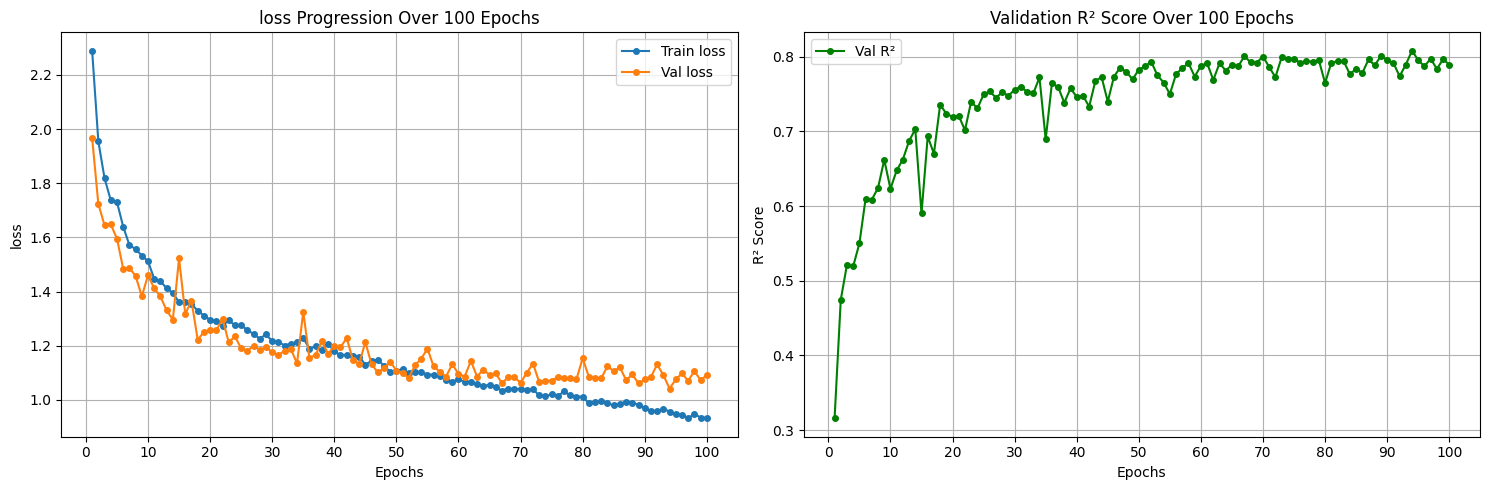

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 5))

# Plot Training & Validation RMSE
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_rmses, label="Train loss", marker='o', markersize=4)
plt.plot(range(1, epochs+1), val_rmses, label="Val loss", marker='o', markersize=4)
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.xticks(np.arange(0, epochs+1, 10))  # Show every 10th epoch
plt.title("loss Progression Over 100 Epochs")
plt.legend()
plt.grid(True)

# Plot Validation R²
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), val_r2s, label="Val R²", color="green", marker='o', markersize=4)
plt.xlabel("Epochs")
plt.ylabel("R² Score")
plt.xticks(np.arange(0, epochs+1, 10))
plt.title("Validation R² Score Over 100 Epochs")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

# Define a test function that evaluates the model on the test loader
@torch.no_grad()
def test(test_loader, model, device):
    model.eval()
    all_preds = []
    all_actuals = []

    for data in test_loader:
        data = data.to(device)
        out = model(data.x, data.edge_index, data.edge_attr, data.batch)
        all_preds.append(out.cpu().numpy())
        all_actuals.append(data.y.cpu().numpy())

    # Combine results from all batches
    preds = np.concatenate(all_preds)
    actuals = np.concatenate(all_actuals)

    mse = mean_squared_error(actuals, preds)
    rmse = sqrt(mse)
    r2 = r2_score(actuals, preds)

    return preds, actuals, rmse, r2

# Create a DataLoader for the test dataset
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, drop_last=False)

# Run testing
preds, actuals, test_rmse, test_r2 = test(test_loader, model, device)
print(f"Test RMSE: {test_rmse:.4f}, Test R²: {test_r2:.4f}")

Test RMSE: 1.1481, Test R²: 0.7641


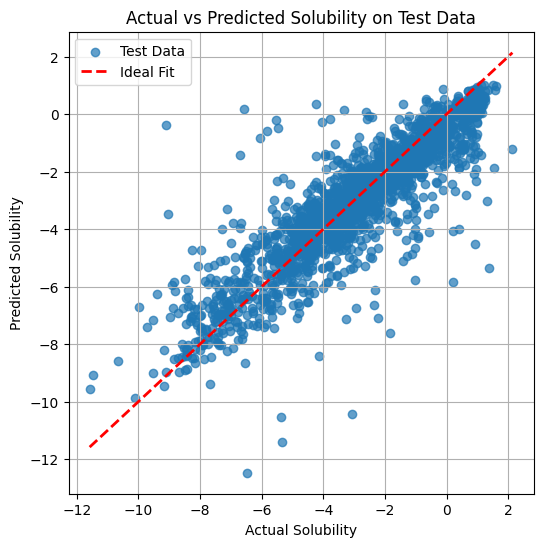

In [ ]:
# Graphical representation: Scatter plot of actual vs predicted solubility values
plt.figure(figsize=(6, 6))
plt.scatter(actuals, preds, alpha=0.7, label='Test Data')
plt.plot([actuals.min(), actuals.max()], [actuals.min(), actuals.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Solubility")
plt.ylabel("Predicted Solubility")
plt.title("Actual vs Predicted Solubility on Test Data")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Display the first 30 rows of the test results DataFrame
test_results_df, test_rmse, test_r2 = eval(test_loader)

# Now this works:
print(test_results_df.head(30))

RMSE: 1.1481, R²: 0.7641
        pred    actual                                             smiles
0  -2.250155 -2.474719                                C/C(C=O)=C/c1ccccc1
1  -6.447352 -6.451762  CCCCCCCCCCCCCCCC(O)C(CO)NC(=O)CCCCCCC\C=C/CCCC...
2  -1.556370 -1.605800                                  CC(=O)c1ccc(N)cc1
3   0.544723  0.848624                                 [Na+].[O-]C(=O)CCl
4  -4.278406 -5.889200                   Oc1ccc2C(=O)c3cc(O)ccc3C(=O)c2c1
5  -3.210372 -4.570000                  O=S1(=O)C2=C(C=CC=C2)C2=C1C=CC=C2
6  -0.976087 -1.011000                                        CCCC1CCCNC1
7  -6.641490 -7.946875  O=C1c2ccccc2C(=O)c3c4Nc5ccc6C(=O)c7ccccc7C(=O)...
8  -1.640900 -1.141273                            Nc1ccc(cc1)[S](O)(=O)=O
9  -1.772434 -1.919235                   C1OC1COc2ccc(cc2)N(CC3CO3)CC4CO4
10 -0.010598  0.397509                                    CC(=O)C1CCOC1=O
11 -5.404959 -5.200000                               c1ccccc1c2ccc(Cl)cc2
12 -1.493559 

In [ ]:
df1=pd.read_csv('/content/BigSolDB.csv')
df1

,SMILES,"T,K",Solubility,Solvent,SMILES_Solvent,Source
0,ON(Cc1ccccc1)Cc1ccccc1,273.15,0.001261,methanol,CO,10.1021/acs.jced.9b01028
1,ON(Cc1ccccc1)Cc1ccccc1,279.15,0.001713,methanol,CO,10.1021/acs.jced.9b01028
2,ON(Cc1ccccc1)Cc1ccccc1,283.45,0.002094,methanol,CO,10.1021/acs.jced.9b01028
3,ON(Cc1ccccc1)Cc1ccccc1,289.05,0.002760,methanol,CO,10.1021/acs.jced.9b01028
4,ON(Cc1ccccc1)Cc1ccccc1,293.05,0.003327,methanol,CO,10.1021/acs.jced.9b01028
...,...,...,...,...,...,...
54268,COC(=O)C1CC(=O)C(C(=O)OC)CC1=O,314.65,0.016360,DMS,COC(=O)CCC(=O)OC,10.1016/j.fluid.2014.04.012
54269,COC(=O)C1CC(=O)C(C(=O)OC)CC1=O,318.05,0.018920,DMS,COC(=O)CCC(=O)OC,10.1016/j.fluid.2014.04.012
54270,COC(=O)C1CC(=O)C(C(=O)OC)CC1=O,320.65,0.021050,DMS,COC(=O)CCC(=O)OC,10.1016/j.fluid.2014.04.012
54271,COC(=O)C1CC(=O)C(C(=O)OC)CC1=O,323.25,0.023430,DMS,COC(=O)CCC(=O)OC,10.1016/j.fluid.2014.04.012


In [ ]:
df_methanol = df1[df1['Solvent'].str.contains('methanol', case=False, na=False)]
df_methanol

,SMILES,"T,K",Solubility,Solvent,SMILES_Solvent,Source
0,ON(Cc1ccccc1)Cc1ccccc1,273.15,0.001261,methanol,CO,10.1021/acs.jced.9b01028
1,ON(Cc1ccccc1)Cc1ccccc1,279.15,0.001713,methanol,CO,10.1021/acs.jced.9b01028
2,ON(Cc1ccccc1)Cc1ccccc1,283.45,0.002094,methanol,CO,10.1021/acs.jced.9b01028
3,ON(Cc1ccccc1)Cc1ccccc1,289.05,0.002760,methanol,CO,10.1021/acs.jced.9b01028
4,ON(Cc1ccccc1)Cc1ccccc1,293.05,0.003327,methanol,CO,10.1021/acs.jced.9b01028
...,...,...,...,...,...,...
4424,COC(=O)C1CC(=O)C(C(=O)OC)CC1=O,313.15,0.000700,methanol,CO,10.1016/j.fluid.2013.06.037
4425,COC(=O)C1CC(=O)C(C(=O)OC)CC1=O,318.15,0.000900,methanol,CO,10.1016/j.fluid.2013.06.037
4426,COC(=O)C1CC(=O)C(C(=O)OC)CC1=O,323.15,0.001130,methanol,CO,10.1016/j.fluid.2013.06.037
4427,COC(=O)C1CC(=O)C(C(=O)OC)CC1=O,328.15,0.001440,methanol,CO,10.1016/j.fluid.2013.06.037


In [ ]:
import numpy as np

# Convert solubility to log(s) (base-10 logarithm)
df_methanol['logS'] = np.log10(df_methanol['Solubility'])

# Display the updated DataFrame
print(df_methanol[['SMILES', 'Solubility', 'logS']].head())

                   SMILES  Solubility      logS
0  ON(Cc1ccccc1)Cc1ccccc1    0.001261 -2.899285
1  ON(Cc1ccccc1)Cc1ccccc1    0.001713 -2.766243
2  ON(Cc1ccccc1)Cc1ccccc1    0.002094 -2.679023
3  ON(Cc1ccccc1)Cc1ccccc1    0.002760 -2.559091
4  ON(Cc1ccccc1)Cc1ccccc1    0.003327 -2.477947


<ipython-input-46-0a84158d9cb3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_methanol['logS'] = np.log10(df_methanol['Solubility'])


In [ ]:
# Drop the 'Solubility' column
df_methanol.drop(columns=['Solubility'], inplace=True)

# Rename 'logS' to 'solubility'
df_methanol.rename(columns={'logS': 'solubility'}, inplace=True)

# Verify the changes
print(df_methanol.columns)

Index(['SMILES', 'T,K', 'Solvent', 'SMILES_Solvent', 'Source', 'solubility'], dtype='object')


<ipython-input-47-b2a37f154613>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_methanol.drop(columns=['Solubility'], inplace=True)
<ipython-input-47-b2a37f154613>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_methanol.rename(columns={'logS': 'solubility'}, inplace=True)


In [ ]:
df_methanol

,SMILES,"T,K",Solvent,SMILES_Solvent,Source,solubility
0,ON(Cc1ccccc1)Cc1ccccc1,273.15,methanol,CO,10.1021/acs.jced.9b01028,-2.899285
1,ON(Cc1ccccc1)Cc1ccccc1,279.15,methanol,CO,10.1021/acs.jced.9b01028,-2.766243
2,ON(Cc1ccccc1)Cc1ccccc1,283.45,methanol,CO,10.1021/acs.jced.9b01028,-2.679023
3,ON(Cc1ccccc1)Cc1ccccc1,289.05,methanol,CO,10.1021/acs.jced.9b01028,-2.559091
4,ON(Cc1ccccc1)Cc1ccccc1,293.05,methanol,CO,10.1021/acs.jced.9b01028,-2.477947
...,...,...,...,...,...,...
4424,COC(=O)C1CC(=O)C(C(=O)OC)CC1=O,313.15,methanol,CO,10.1016/j.fluid.2013.06.037,-3.154902
4425,COC(=O)C1CC(=O)C(C(=O)OC)CC1=O,318.15,methanol,CO,10.1016/j.fluid.2013.06.037,-3.045757
4426,COC(=O)C1CC(=O)C(C(=O)OC)CC1=O,323.15,methanol,CO,10.1016/j.fluid.2013.06.037,-2.946922
4427,COC(=O)C1CC(=O)C(C(=O)OC)CC1=O,328.15,methanol,CO,10.1016/j.fluid.2013.06.037,-2.841638


In [ ]:
import pandas as pd
import torch
from rdkit import Chem
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.utils import from_smiles
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# -------------------------------
# 1. Prepare the BigSolDB Data (Methanol subset)
# -------------------------------
# Assume df_bigsol is your loaded BigSolDB DataFrame.
# Filter rows for methanol measurements (adjust the column name and value as necessary).
df_methanol = df1[df1['Solvent'].str.lower() == 'methanol'].copy()
df_methanol.reset_index(drop=True, inplace=True)

# Optional: Print number of entries for methanol
print(f"Number of methanol entries: {len(df_methanol)}")

# -------------------------------
# 2. Convert SMILES to Graphs
# -------------------------------
graph_list_transfer = []
for i, row in df_methanol.iterrows():
    smile = row['SMILES']
    # Convert the SMILES string into a graph representation
    g = from_smiles(smile)
    if g is None:
        continue  # Skip if conversion fails
    g.x = g.x.float()
    # Assume the solubility values are stored in a column 'Solubility'
    y = torch.tensor(row['Solubility'], dtype=torch.float).view(1, -1)
    g.y = y
    # (Optional) Save the SMILES in the data object for later plotting
    g.smiles = smile
    graph_list_transfer.append(g)

print(f"Total graphs in methanol subset: {len(graph_list_transfer)}")

# -------------------------------
# 3. Create Train/Validation/Test Splits
# -------------------------------
# Define the ratios for splitting
train_ratio = 0.60
val_ratio = 0.20
test_ratio = 0.20

dataset_size = len(graph_list_transfer)
train_size = int(train_ratio * dataset_size)
val_size = int(val_ratio * dataset_size)
test_size = dataset_size - train_size - val_size

# Use torch's random_split for reproducibility
generator1 = torch.Generator().manual_seed(42)
train_dataset, temp_dataset = torch.utils.data.random_split(graph_list_transfer, [train_size, val_size + test_size], generator=generator1)

generator2 = torch.Generator().manual_seed(42)
val_dataset, test_dataset = torch.utils.data.random_split(temp_dataset, [val_size, test_size], generator=generator2)

print(f"Train: {len(train_dataset)}, Val: {len(val_dataset)}, Test: {len(test_dataset)}")

# Create DataLoaders
batch_size = 64
train_loader_transfer = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader_transfer = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader_transfer = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=False)

# -------------------------------
# 4. Prepare the Pre-trained Model for Transfer Learning
# -------------------------------
# 4. Prepare the Pre-trained Model for Transfer Learning
# -------------------------------
# Fine-tune the entire network: ensure all parameters are trainable
for param in model.parameters():
    param.requires_grad = True

# Reinitialize the optimizer for transfer learning (using a lower learning rate)
transfer_optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)

# Add a learning rate scheduler that reduces the LR when the validation RMSE plateaus
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(transfer_optimizer, mode='min', factor=0.5, patience=20, verbose=True)

# Set device and move model to device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# -------------------------------
# 5. Define Transfer Training & Evaluation Functions
# -------------------------------
def train_one_epoch_transfer(loader, model, optimizer, device):
    model.train()
    total_loss = 0.0
    total_samples = 0

    for data in loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data.x, data.edge_index, data.edge_attr, data.batch)
        if out.shape[0] != data.y.shape[0]:
            print(f"Skipping batch with mismatched shapes: out={out.shape}, y={data.y.shape}")
            continue
        loss = torch.nn.functional.mse_loss(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += float(loss) * data.num_graphs
        total_samples += data.num_graphs
    return sqrt(total_loss / total_samples) if total_samples > 0 else float('nan')

@torch.no_grad()
def validate_transfer(loader, model, device):
    model.eval()
    preds = []
    actuals = []
    for data in loader:
        data = data.to(device)
        out = model(data.x, data.edge_index, data.edge_attr, data.batch)
        preds.append(out.cpu().numpy())
        actuals.append(data.y.cpu().numpy())
    preds = np.concatenate(preds)
    actuals = np.concatenate(actuals)
    mse = mean_squared_error(actuals, preds)
    rmse = sqrt(mse)
    r2 = r2_score(actuals, preds)
    return rmse, r2

# -------------------------------
# 6. Fine-tune the Model on the Methanol Subset
# -------------------------------
transfer_epochs = 500  # You can adjust the number of epochs
train_rmses_transfer = []
val_rmses_transfer = []
val_r2s_transfer = []

for epoch in range(transfer_epochs):
    # Train one epoch on the methanol subset
    train_rmse = train_one_epoch_transfer(train_loader_transfer, model, transfer_optimizer, device)
    train_rmses_transfer.append(train_rmse)

    # Evaluate on the validation set
    val_rmse, val_r2 = validate_transfer(val_loader_transfer, model, device)
    val_rmses_transfer.append(val_rmse)
    val_r2s_transfer.append(val_r2)

    # Update the learning rate scheduler based on the validation RMSE
    scheduler.step(val_rmse)

    print(f"[Transfer Epoch {epoch+1:03d}/{transfer_epochs}] Train RMSE: {train_rmse:.4f}, Val RMSE: {val_rmse:.4f}, Val R²: {val_r2:.4f}")


Number of methanol entries: 4429
Total graphs in methanol subset: 4429
Train: 2657, Val: 885, Test: 887


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


[Transfer Epoch 001/500] Train RMSE: 0.0803, Val RMSE: 0.0734, Val R²: 0.1475
[Transfer Epoch 002/500] Train RMSE: 0.0802, Val RMSE: 0.0720, Val R²: 0.1790
[Transfer Epoch 003/500] Train RMSE: 0.0774, Val RMSE: 0.0723, Val R²: 0.1718
[Transfer Epoch 004/500] Train RMSE: 0.0783, Val RMSE: 0.0696, Val R²: 0.2320
[Transfer Epoch 005/500] Train RMSE: 0.0777, Val RMSE: 0.0704, Val R²: 0.2150
[Transfer Epoch 006/500] Train RMSE: 0.0763, Val RMSE: 0.0718, Val R²: 0.1827
[Transfer Epoch 007/500] Train RMSE: 0.0748, Val RMSE: 0.0717, Val R²: 0.1860
[Transfer Epoch 008/500] Train RMSE: 0.0757, Val RMSE: 0.0683, Val R²: 0.2623
[Transfer Epoch 009/500] Train RMSE: 0.0743, Val RMSE: 0.0685, Val R²: 0.2568
[Transfer Epoch 010/500] Train RMSE: 0.0732, Val RMSE: 0.0693, Val R²: 0.2393
[Transfer Epoch 011/500] Train RMSE: 0.0725, Val RMSE: 0.0695, Val R²: 0.2348
[Transfer Epoch 012/500] Train RMSE: 0.0737, Val RMSE: 0.0683, Val R²: 0.2612
[Transfer Epoch 013/500] Train RMSE: 0.0727, Val RMSE: 0.0686, V

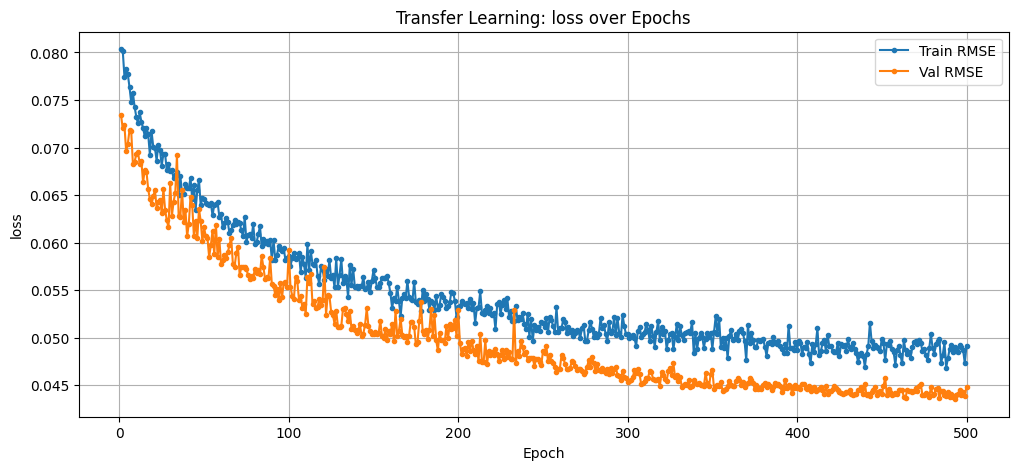

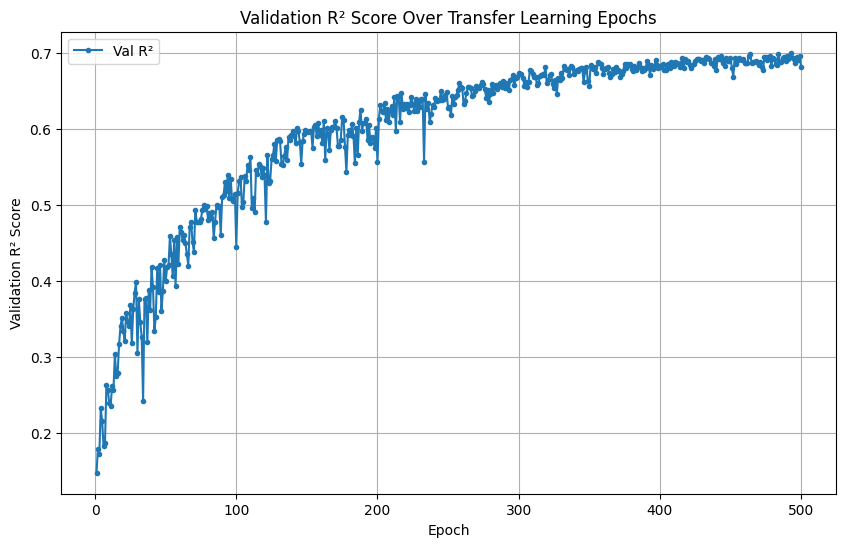

In [ ]:
# Optional: Plot training and validation RMSE progression during transfer learning
plt.figure(figsize=(12, 5))
plt.plot(range(1, transfer_epochs+1), train_rmses_transfer, label="Train RMSE", marker='o', markersize=3)
plt.plot(range(1, transfer_epochs+1), val_rmses_transfer, label="Val RMSE", marker='o', markersize=3)
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.title("Transfer Learning: loss over Epochs")
plt.legend()
plt.grid(True)
plt.show()


# -------------------------------
# Plot Validation R² over epochs
# -------------------------------
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(val_r2s_transfer)+1), val_r2s_transfer, marker='o', markersize=3, label="Val R²")
plt.xlabel("Epoch")
plt.ylabel("Validation R² Score")
plt.title("Validation R² Score Over Transfer Learning Epochs")
plt.legend()
plt.grid(True)
plt.show()


Test RMSE (Transfer): 0.0516, Test R² (Transfer): 0.6819


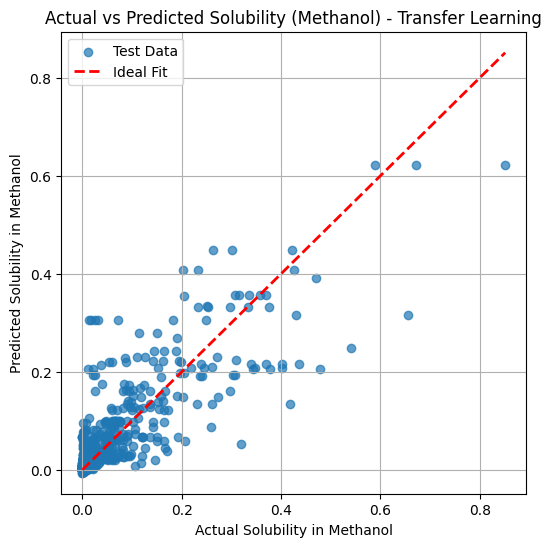

In [ ]:
# 7. Evaluate the Fine-tuned Model on the Test Set & Visualize
# -------------------------------
@torch.no_grad()
def test_transfer(loader, model, device):
    model.eval()
    all_preds = []
    all_actuals = []
    for data in loader:
        data = data.to(device)
        out = model(data.x, data.edge_index, data.edge_attr, data.batch)
        all_preds.append(out.cpu().numpy())
        all_actuals.append(data.y.cpu().numpy())
    preds = np.concatenate(all_preds)
    actuals = np.concatenate(all_actuals)
    mse = mean_squared_error(actuals, preds)
    rmse = sqrt(mse)
    r2 = r2_score(actuals, preds)
    return preds, actuals, rmse, r2

preds_transfer, actuals_transfer, test_rmse_transfer, test_r2_transfer = test_transfer(test_loader_transfer, model, device)
print(f"Test RMSE (Transfer): {test_rmse_transfer:.4f}, Test R² (Transfer): {test_r2_transfer:.4f}")

# Scatter plot for Actual vs Predicted solubility in methanol
plt.figure(figsize=(6, 6))
plt.scatter(actuals_transfer, preds_transfer, alpha=0.7, label='Test Data')
plt.plot([actuals_transfer.min(), actuals_transfer.max()], [actuals_transfer.min(), actuals_transfer.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Solubility in Methanol")
plt.ylabel("Predicted Solubility in Methanol")
plt.title("Actual vs Predicted Solubility (Methanol) - Transfer Learning")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
@torch.no_grad()
def test_transfer_with_smiles(loader, model, device):
    model.eval()
    all_preds = []
    all_actuals = []
    all_smiles = []
    for data in loader:
        data = data.to(device)
        # Forward pass
        out = model(data.x, data.edge_index, data.edge_attr, data.batch)
        # Append predictions and actual values
        all_preds.append(out.cpu().numpy())
        all_actuals.append(data.y.cpu().numpy())
        # Collect SMILES strings stored in each data object.
        # If the batch size is > 1, data.smiles should be a list of smiles.
        all_smiles.extend(data.smiles)

    # Concatenate results from all batches
    preds = np.concatenate(all_preds)
    actuals = np.concatenate(all_actuals)

    mse = mean_squared_error(actuals, preds)
    rmse = sqrt(mse)
    r2 = r2_score(actuals, preds)

    return preds, actuals, all_smiles, rmse, r2

# Run testing on the transfer test loader
preds_transfer, actuals_transfer, smiles_transfer, test_rmse_transfer, test_r2_transfer = test_transfer_with_smiles(test_loader_transfer, model, device)

print(f"Test RMSE (Transfer): {test_rmse_transfer:.4f}, Test R² (Transfer): {test_r2_transfer:.4f}")

# Create a DataFrame with predictions, actual values, and SMILES strings
df_test_results = pd.DataFrame({
    'pred': preds_transfer.flatten(),
    'actual': actuals_transfer.flatten(),
    'smiles': smiles_transfer
})

# Display the first 30 rows of the DataFrame
print(df_test_results.head(30))


Test RMSE (Transfer): 0.0516, Test R² (Transfer): 0.6819
        pred    actual                                             smiles
0   0.017213  0.006685                              c1ccc2c(c1)sc1ccccc12
1   0.207006  0.245700                                  O=C(O)CCCCCC(=O)O
2   0.012559  0.003533                      O=C1C(=Cc2ccco2)CCC1=Cc1ccco1
3   0.000761  0.001130                     COC(=O)C1CC(=O)C(C(=O)OC)CC1=O
4   0.019388  0.002799                           Cn1cnc([N+](=O)[O-])c1Cl
5   0.137733  0.152100                                  CNc1nc(C)nc(OC)n1
6   0.008659  0.000400            COc1ccc(P(c2ccc(OC)cc2)c2ccc(OC)cc2)cc1
7   0.004766  0.000046                COC(=O)Nc1nc2ccc(Sc3ccccc3)cc2[nH]1
8   0.011961  0.000606  CC[C@H](CC[C@@H](C)[C@H]1CC[C@H]2[C@@H]3CC=C4C...
9   0.033545  0.002831                                   O=C(O)c1cccnc1Cl
10  0.037960  0.008090                           O=C(O)[C@@H]1Cc2ccccc2N1
11  0.042428  0.019930                              c1c